<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/impsamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [2]:
import numpy as np
from numpy import exp, sqrt, sin, pi, log, cos
from numpy.random import rand
import seaborn as sns
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(90)

## Original Program of impsamp.py

In [4]:
b = 1000
H = lambda x1, x2: (2*b)**2 * exp(-sqrt(x1**2+x2**2)/4)*(sin(2*sqrt(
        x1**2+x2**2))+1)*(x1**2 + x2**2 < b**2)
f = 1/((2*b)**2)
N = 10**6
X1 = -b + 2*b*rand(N,1)
X2 = -b + 2*b*rand(N,1)
Z = H(X1,X2)
estCMC = np.mean(Z).item()
RECMC = np.std(Z)/estCMC/sqrt(N).item()
print('CI = ({:3.3f},{:3.3f}), RE = {: 3.3f}'.format(estCMC*(1-1.96*RECMC), estCMC*(1+1.96*RECMC),RECMC))


CI = (68.950,107.504), RE =  0.111


## Verify the scattering

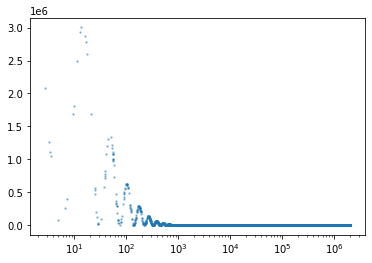

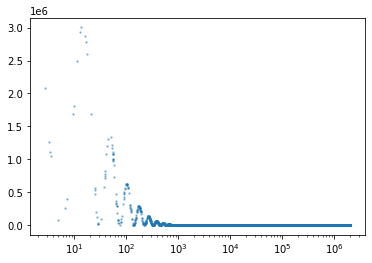

In [5]:
XX = X1**2 + X2**2
A = (2*b)**2*(900**2 + 600**2 < b**2)

H2 = lambda x1, x2: (2*b)**2 * exp(-sqrt(x1**2+x2**2)/4)*(sin(2*sqrt(
        x1**2+x2**2))+1)
Z2 = H2(X1,X2)

plt.scatter(XX, Z, alpha =0.4,s =2)
plt.xscale("log")
plt.show()

plt.scatter(XX, Z2, alpha =0.4,s =2)
plt.xscale("log")
plt.show()


## Original program of impsamp2.py

In [6]:
lam = 0.1;
g = lambda x1, x2: lam*exp(-sqrt(x1**2 + x2**2)*lam)/sqrt(x1**2 + x2**2)/(2*pi);
U = rand(N,1); V = rand(N,1)
R = -log(U)/lam
X1 = R*cos(2*pi*V)
X2 = R*sin(2*pi*V)
Z = H(X1,X2)*f/g(X1,X2)
estIS = np.mean(Z).item()  # obtain scalar
REIS = np.std(Z)/estIS/sqrt(N).item()
print('CI = ({:3.3f},{:3.3f}), RE = {: 3.3f}'.format(estIS*(1-1.96*REIS), estIS*(1+1.96*REIS),REIS))

CI = (100.646,101.000), RE =  0.001


## Verify the scattering

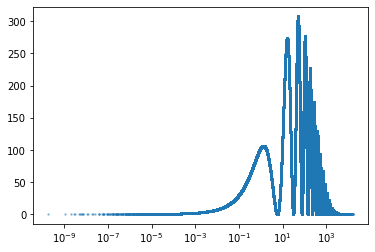

In [7]:
XX = X1**2 + X2**2

H2 = lambda x1, x2: (2*b)**2 * exp(-sqrt(x1**2+x2**2)/4)*(sin(2*sqrt(
        x1**2+x2**2))+1)

plt.scatter(XX, Z, alpha =0.4,s =2)
plt.xscale("log")
plt.show()